In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# make randomness the same with every run
np.random.seed(42)

# read in data
raw_data = pd.read_csv("ml_data.csv")

## Get various featuresets

In [2]:
raw_data.head()

,Unnamed: 0,loan_amount,term_in_months,rural_pct,mpi_national,mpi_regional,headcount_ratio_regional,intensity_of_deprivation_regional,mpi_urban,headcount_ratio_urban,...,sector_Clothing,sector_Education,sector_Food,sector_Housing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_high,sector_low
0,0,575.0,11.0,0.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,0,1,0,0
1,1,200.0,11.0,0.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,0,0,0,1
2,2,400.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,1,0,0,0,0,0,0,0
3,3,400.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,1,0,0,0
4,4,475.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
data = raw_data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469808 entries, 0 to 469807
Data columns (total 87 columns):
Unnamed: 0                                      469808 non-null int64
loan_amount                                     469808 non-null float64
term_in_months                                  469808 non-null float64
rural_pct                                       469808 non-null float64
mpi_national                                    469808 non-null float64
mpi_regional                                    469808 non-null float64
headcount_ratio_regional                        469808 non-null float64
intensity_of_deprivation_regional               469808 non-null float64
mpi_urban                                       469808 non-null float64
headcount_ratio_urban                           469808 non-null float64
intensity_of_deprivation_urban                  469808 non-null float64
mpi_rural                                       469808 non-null float64
headcount_ratio_rural      

In [5]:
hours_data = data.copy()
hours_data.drop(columns=["funding_velocity", ], inplace=True)

In [6]:
vel_data = data.copy()
vel_data.drop(columns=["hours_till_funded"], inplace=True)

In [7]:
plottable = data.replace([np.inf, -np.inf], np.nan).dropna(subset=["hours_till_funded"], how="all")

In [8]:
plottable.hours_till_funded.describe()

count    467810.000000
mean        382.772639
std         716.877986
min           1.000000
25%         124.000000
50%         230.000000
75%         554.000000
max       98510.422488
Name: hours_till_funded, dtype: float64

In [9]:
((data.hours_till_funded > 720).sum())/data.shape[0]

0.15895216769403672

In [10]:
hours_data["funded_in_month"] = hours_data["hours_till_funded"] < 720

In [11]:
in_month_data = hours_data.drop(columns=["hours_till_funded", "num_male_borrowers", "num_female_borrowers"], inplace=False)

In [12]:
in_month_data.head()

,Unnamed: 0,loan_amount,term_in_months,rural_pct,mpi_national,mpi_regional,headcount_ratio_regional,intensity_of_deprivation_regional,mpi_urban,headcount_ratio_urban,...,sector_Education,sector_Food,sector_Housing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_high,sector_low,funded_in_month
0,0,575.0,11.0,0.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,1,0,0,True
1,1,200.0,11.0,0.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,0,0,1,True
2,2,400.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,1,0,0,0,0,0,0,0,True
3,3,400.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,1,0,0,0,True
4,4,475.0,14.0,25.0,0.23,0.184,36.6,50.3,0.087,20.0,...,0,0,0,0,0,0,0,0,1,True


In [13]:
in_month_data["funded_in_month"] = in_month_data["funded_in_month"].astype("int")

In [14]:
# drop price from X values
X_encoded = in_month_data.drop(labels=['funded_in_month'], axis=1)
# save price to separate dataframe
y_encoded = in_month_data['funded_in_month'].copy()

In [15]:
y_encoded.head()

0    1
1    1
2    1
3    1
4    1
Name: funded_in_month, dtype: int64

In [16]:
# shuffle and split data for testing/training
train_set_X, test_set_X, train_set_y, test_set_y, = train_test_split(X_encoded, y_encoded, test_size=0.2)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# method to evaluate regression models
def evaluate(model):
    test_predictions = model.predict(test_set_X) # get predictions with test data
    f1_test = f1_score(test_set_y, test_predictions)
    print("f1 using test set: " + str(f1_test))
    
    train_predictions = model.predict(train_set_X) # get predictions with training data
    f1_train = f1_score(train_set_y, train_predictions)
    print("f1 using train set: " + str(f1_train))
    
    # confusion matrix, precision and recall
    print(confusion_matrix(test_set_y, test_predictions))
    print("Precision: " + str(precision_score(test_set_y, test_predictions)))
    print("Recall: " + str(recall_score(test_set_y, test_predictions)))   
    
    # ROC and ROC AUC
    print("Area under the ROC curve: " + str(roc_auc_score(test_set_y, test_predictions, average="macro", sample_weight=None)))
    fpr, tpr, thresholds = roc_curve(test_set_y, test_predictions)
    plt.plot(fpr, tpr)
    plt.show()

f1 using test set: 0.935842762646652
f1 using train set: 0.997040295083214
[[ 9743  5231]
 [ 4924 74064]]
Precision: 0.934031149505013
Recall: 0.9376614169240898
Area under the ROC curve: 0.7941612814552331


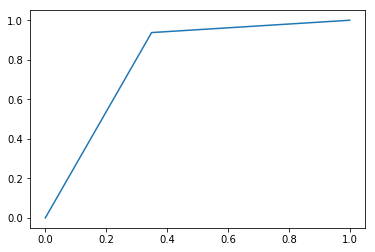

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_set_X, train_set_y) 

evaluate(rfc)

In [19]:
from sklearn.utils import resample

train_set = train_set_X.copy()
train_set["y"] = train_set_y

majority = train_set[train_set.y==1]
minority = train_set[train_set.y==0]

# Upsample minority class
majority_downsampled = resample(majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority.index), # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
train_set_new = pd.concat([majority_downsampled, minority])

print(train_set_new.y.value_counts())

# drop price from X values
X_resampled = train_set_new.drop(labels=['y'], axis=1)
# save price to separate dataframe
y_resampled = train_set_new['y'].copy()

1    60049
0    60049
Name: y, dtype: int64



Random forest results when trained with downsampled classes:
f1 using test set: 0.8848383616939833
f1 using train set: 0.911677879166796
[[13846  1128]
 [15419 63569]]
Precision: 0.9825648793607122
Recall: 0.8047931331341469
Area under the ROC curve: 0.8647312800704794


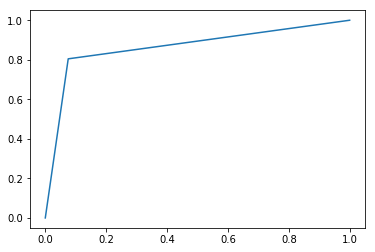

In [20]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled) 

print()
print("Random forest results when trained with downsampled classes:")
evaluate(rfc)

In [21]:
train_set = train_set_X.copy()
train_set["y"] = train_set_y

majority = train_set[train_set.y==1]
minority = train_set[train_set.y==0]

# Upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(majority.index), # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
train_set_new = pd.concat([majority, minority_upsampled])

print(train_set_new.y.value_counts())

# drop price from X values
X_resampled = train_set_new.drop(labels=['y'], axis=1)
# save price to separate dataframe
y_resampled = train_set_new['y'].copy()

1    315797
0    315797
Name: y, dtype: int64



Random forest results when trained with upsampled classes:
f1 using test set: 0.931378238609252
f1 using train set: 0.9966138843447739
[[11100  3874]
 [ 6768 72220]]
Precision: 0.9490892843062528
Recall: 0.9143160986478959
Area under the ROC curve: 0.8278004962319219


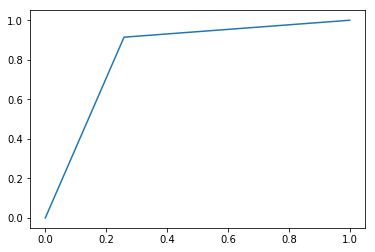

In [22]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled) 

print()
print("Random forest results when trained with upsampled classes:")
evaluate(rfc)

In [25]:
less_than_month = in_month_data[in_month_data["funded_in_month"] == 1]
less_than_month.loan_amount.mean()

614.5983256709349

In [26]:
greater_than_month = in_month_data[in_month_data["funded_in_month"] == 0]
greater_than_month.loan_amount.mean()

932.3510790024393